# Machine Learning Engineer Nanodegree
## Capstone Project: *Medical Appointment No-Show Prediction*

----
## Exploring the Data
Load necessary Python libraries and load the census data. Note that the last column from this dataset, `'No-show'`, will be our target label (whether a patient show up in the appointment). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("KaggleV2-May-2016.csv")

# Success - Display the first 5 records
display(data.head(n=5))

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Get rid of typos

In [2]:
# Correct typos of column names
data.rename(columns={'PatientId':'PatientID', 'Neighbourhood':'Neighborhood',
                   'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show':'NoShow'}, inplace=True)

Check the number of patients and the number of appointments

In [3]:
print("the number of patients is:\t%s" %len(data.PatientID.unique()))
print("the number of appointments is:\t%s" %len(data.AppointmentID.unique()))
print("the number of records is:\t%s" %len(data))

the number of patients is:	62299
the number of appointments is:	110527
the number of records is:	110527


It is obvious that there were some patients who made several appointments during the time period. Although the history of the patients' appointments is important to the no-show prediction, I won't include these 2 features in the analysis in order to avoid the data leakage.

Add waiting time in the unit of day.

In [4]:
# Add the number of days between Scheduled Day and Appointment Day
data.ScheduledDay = data.ScheduledDay.apply(np.datetime64)
data.AppointmentDay = data.AppointmentDay.apply(np.datetime64)

data['WaitDay'] = data.AppointmentDay - data.ScheduledDay

# New feature = number of days between ScheduledDay and AppointmentDay
data['WaitDay'] = data['WaitDay'] / np.timedelta64(1, 'D')
data['WaitDay'] = data['WaitDay'].apply(np.ceil)
display(data.head(n=5))

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,WaitDay
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-0.0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-0.0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-0.0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-0.0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-0.0


Add the Appointment Day of the week

In [5]:
# Add the Appointment Day of the week
data['AppointmentDay_DOW'] = data['AppointmentDay'].dt.weekday_name

Check features

In [6]:
print('Gender:\t%s' %data.Gender.unique())
print('\n')
print('Age:\t%s' %sorted(data.Age.unique()))
print('\n')
print('Number of neighborhoods:\t%s' %data.Neighborhood.nunique())
print('Neighborhood:\t%s' %sorted(data.Neighborhood.unique()))
print('\n')
print('WaitDay:\t%s' %sorted(data.WaitDay.unique()))
print('\n')
print('AppointmentDay_DOW:\t%s' %sorted(data.AppointmentDay_DOW.unique()))
print('\n')
print('Scholarship:\t%s' %data.Scholarship.unique())
print('Hypertension:\t%s' %data.Hypertension.unique())
print('Diabetes:\t%s' %data.Diabetes.unique())
print('Alchoholism:\t%s' %data.Alcoholism.unique())
print('Handicap:\t%s' %data.Handicap.unique())
print('SMS_received:\t%s' %data.SMS_received.unique())
print('NoShow:\t%s' %data.NoShow.unique())

Gender:	['F' 'M']


Age:	[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


Number of neighborhoods:	81
Neighborhood:	['AEROPORTO', 'ANDORINHAS', 'ANT\xc3\x94NIO HON\xc3\x93RIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATO\xc3\x8dRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLA\xc3\x87\xc3\x83O', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SU\xc3\x81', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE S\xc3\x83O JO\xc3\x83O', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VIT\xc3\x93RIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA'

Now let's check the 'age' distribution.

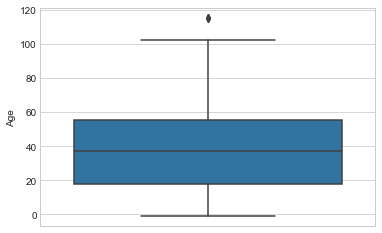

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
ax = sns.boxplot(y=data.Age)

From the above BoxPlot we can see that the Median Age is around 35 and the IQR is between 18 and 55. The BoxPlot shows few datapoints as outliers which are ages above 100. 

For more details, we can plot the number of appointments per age.

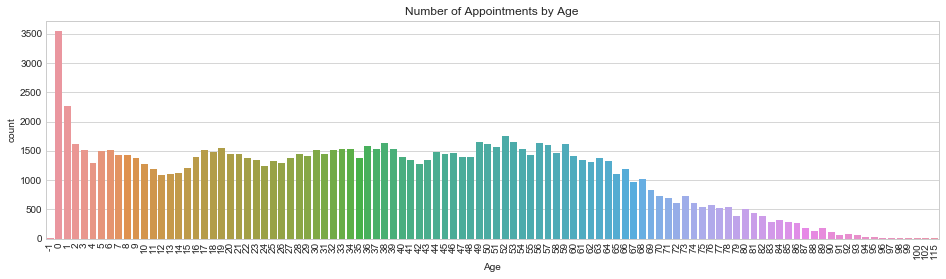

In [8]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=data.Age)
ax.set_title("Number of Appointments by Age")
plt.show()

Apparently, the age should not be negative. Also age exceeds 100 should be treated as outlier. 

Now let's check the WaitDay distribution. 

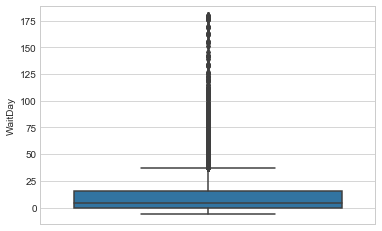

In [9]:
sns.set_style("whitegrid")
ax = sns.boxplot(y=data.WaitDay)

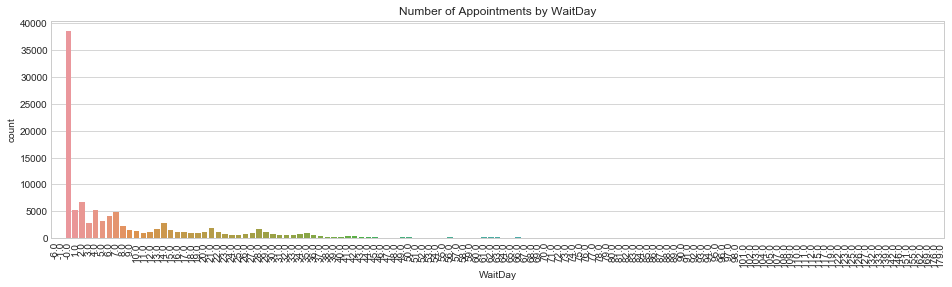

In [10]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=data.WaitDay)
ax.set_title("Number of Appointments by WaitDay")
plt.show()

The 0 WaitDay means the same day appointment. The WaitDay should not be negative. I assume these are typos which should be removed.

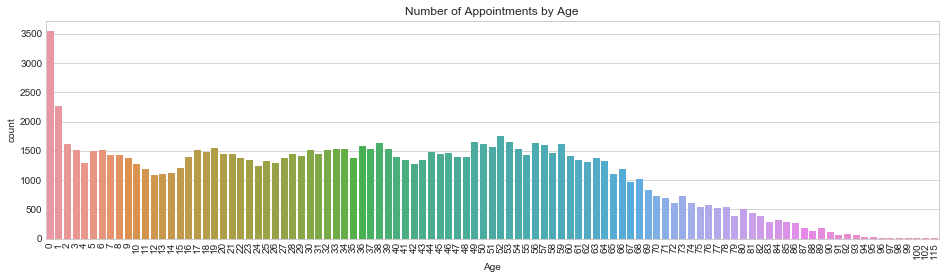

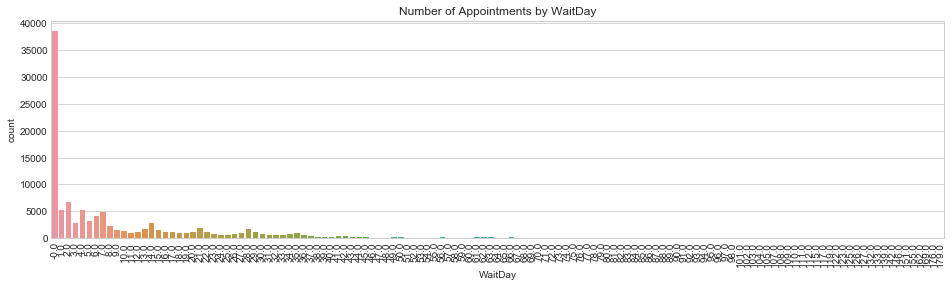

In [11]:
df = data[(data.Age >= 0) & (data.WaitDay >= 0)]

# plots of distribution after data filtering
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("Number of Appointments by Age")
plt.show()

plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.WaitDay)
ax.set_title("Number of Appointments by WaitDay")
plt.show()

Now Let's check the data imbalance.

In [12]:
print("the overall no-show rate is:\t%f" %(len(df[df.NoShow=='Yes'])*1.0/len(df)))

the overall no-show rate is:	0.201898


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`Age'` and `'WaitDay'`. 


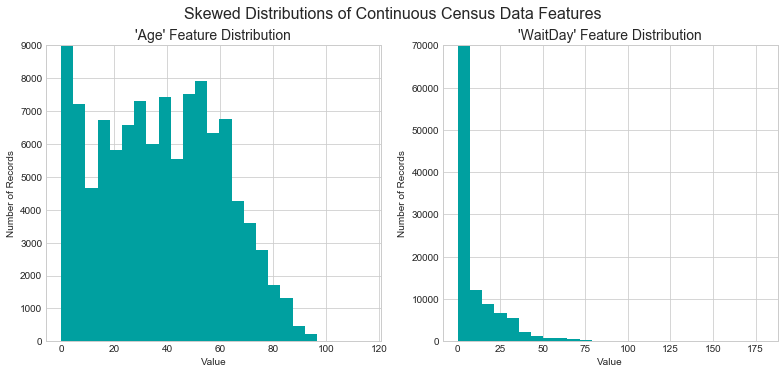

In [13]:
# Split the data into features and target label
y = df['NoShow']
features_raw = df.drop(['NoShow','PatientID','AppointmentID','ScheduledDay', 'AppointmentDay'], axis = 1)

# Visualize skewed continuous features of original data
import matplotlib.pyplot as pl
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")

fig = pl.figure(figsize = (11,5));

# Skewed feature plotting
for i, feature in enumerate(['Age','WaitDay']):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(features_raw[feature], bins=25, color = '#00A0A0')
    ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of Records")
    if i==0:
        ax.set_ylim((0, 5000))
        ax.set_yticks([0, 1000, 2000, 3000, 4000, 5000,6000,7000,8000,9000])
        ax.set_yticklabels([0, 1000, 2000, 3000, 4000, 5000,6000,7000,8000,9000])
    else:
        ax.set_ylim((0, 35000))
        ax.set_yticks([0, 10000, 20000, 30000,40000,50000,60000,70000])
        ax.set_yticklabels([0, 10000, 20000, 30000,40000,50000,60000,70000])

fig.suptitle("Skewed Distributions of Continuous Census Data Features", fontsize = 16, y = 1.03)
fig.tight_layout()
fig.show()

For highly-skewed feature distributions such as `'Age'` and `'WaitDay'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.


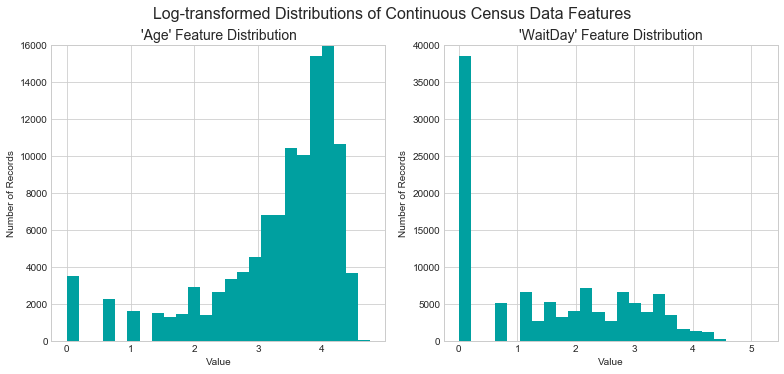

In [14]:
# Log-transform the skewed features
skewed = ['Age','WaitDay']
features_raw[skewed] = df[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions

fig = pl.figure(figsize = (11,5));
for i, feature in enumerate(['Age','WaitDay']):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(features_raw[feature], bins=25, color = '#00A0A0')
    ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of Records")
    if i==0:
        ax.set_ylim((0, 10000))
        ax.set_yticks([0, 2000, 4000, 6000, 8000, 10000, 12000,14000,16000])
        ax.set_yticklabels([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000,16000])
    else:
        ax.set_ylim((0, 8000))
        ax.set_yticks([0, 5000,10000, 15000,20000,25000,30000,35000,40000])
        ax.set_yticklabels([0, 5000,10000, 15000,20000,25000,30000,35000,40000])

fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", fontsize = 16, y = 1.03)
fig.tight_layout()
fig.show()

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'Age'` or `'WaitDay'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. 

We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [15]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['Age','WaitDay']
features_raw[numerical] = scaler.fit_transform(df[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,Gender,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitDay,AppointmentDay_DOW
0,F,0.53913,JARDIM DA PENHA,0,1,0,0,0,0,0.0,Friday


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric.  
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'NoShow'` to numerical entries.
   - Set records with "No" to `0` and records with "Yes" to `1`.

In [16]:
features_raw['Gender'] = features_raw['Gender'].apply(lambda x: 1 if x == 'M' else 0)

features_raw['Handicap'] = features_raw['Handicap'].astype('str')

One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

# Encode the 'NoShow' data to numerical values
y = df['NoShow'].apply(lambda x: 1 if x == 'Yes' else 0)

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# print the encoded feature names
print(encoded)

100 total features after one-hot encoding.
['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'WaitDay', 'Neighborhood_AEROPORTO', 'Neighborhood_ANDORINHAS', 'Neighborhood_ANT\xc3\x94NIO HON\xc3\x93RIO', 'Neighborhood_ARIOVALDO FAVALESSA', 'Neighborhood_BARRO VERMELHO', 'Neighborhood_BELA VISTA', 'Neighborhood_BENTO FERREIRA', 'Neighborhood_BOA VISTA', 'Neighborhood_BONFIM', 'Neighborhood_CARATO\xc3\x8dRA', 'Neighborhood_CENTRO', 'Neighborhood_COMDUSA', 'Neighborhood_CONQUISTA', 'Neighborhood_CONSOLA\xc3\x87\xc3\x83O', 'Neighborhood_CRUZAMENTO', 'Neighborhood_DA PENHA', 'Neighborhood_DE LOURDES', 'Neighborhood_DO CABRAL', 'Neighborhood_DO MOSCOSO', 'Neighborhood_DO QUADRO', 'Neighborhood_ENSEADA DO SU\xc3\x81', 'Neighborhood_ESTRELINHA', 'Neighborhood_FONTE GRANDE', 'Neighborhood_FORTE S\xc3\x83O JO\xc3\x83O', 'Neighborhood_FRADINHOS', 'Neighborhood_GOIABEIRAS', 'Neighborhood_GRANDE VIT\xc3\x93RIA', 'Neighborhood_GURIGICA', 'Neighborhood_HORTO', 

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.


In [17]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'NoShow' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 88416 samples.
Testing set has 22105 samples.


C:\Users\cz043d\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance


### Metrics 

As the classes are imbalanced, F1-score will be the evaluation metric to quantify both the benchmark model and the solution model. F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

### Benchmark Model 
The benchmark model is a simple out-of-the-box version of random forests trained on the same training data as the final solution. The parameters in the classifier are all default. 

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, accuracy_score

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

predictions_test = rf_clf.predict(X_test)
# print predictions_test
score = fbeta_score(y_test, predictions_test, beta = 1)
print score

0.275780789629


The F1 score of the benchmark model is 0.27.

### Model Tuning 

In this part, I will use grid search technique and k-fold cross-validation training technique to optimize the benchmark model.

In [19]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, KFold
from time import time

n_params = { 'n_estimators':[3,5,10,50],
              'criterion':['gini','entropy'],
              'max_depth': [3,4,5],
               'min_samples_split':[2,3,4,5],
            'min_samples_leaf':[1,2],
               'class_weight':['balanced',None]}


scorer = make_scorer(fbeta_score, beta=1)

# Perform grid search on the classifier using 'scorer' as the scoring method
gsrf = GridSearchCV(rf_clf, n_params, cv= KFold(n_splits=5,shuffle=True), scoring=scorer)

print "start"
start = time() # Get start time

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = gsrf.fit(X_train, y_train)
end = time() # Get end time
print "finish"
t_elaps = end - start
print t_elaps

# Get the estimator
best_clf = gsrf.best_estimator_

# Make predictions using the optimized model
best_predictions = best_clf.predict(X_test)
print "\n"
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 1))
print "\n"
print "The optimized model is"
print best_clf

start


C:\Users\cz043d\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


finish
1187.78699994


Final F-score on the testing data: 0.4354


The optimized model is
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)


### Sensitivity

An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. To test the robustness of the model, I applied the same training techniques 5 times with different training and testing sets to see how the F1 score on the testing sets changes with the data it's trained on.

In [20]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, KFold
from time import time

n_params = { 'n_estimators':[3,5,10,50],
              'criterion':['gini','entropy'],
              'max_depth': [3,4,5],
               'min_samples_split':[2,3,4,5],
            'min_samples_leaf':[1,2],
               'class_weight':['balanced',None]}

def fit_model(X, y):
    """ Performs grid search over parameter for a 
        random forest regressor trained on the input data [X, y]. """
 
    scorer = make_scorer(fbeta_score, beta=1)

    # Create the grid search object
    gsrf = GridSearchCV(rf_clf, n_params, cv= KFold(n_splits=5,shuffle=True), scoring=scorer)

    # Fit the grid search object to the data to compute the optimal model
    grid_fit = gsrf.fit(X_train, y_train)

    # Return the optimal model after fitting the data
    return gsrf.best_estimator_


In [21]:
def PredictTrials(X, y, fitter):
    """ Performs trials of fitting and predicting data. """

    # Store the F1 score
    f1 = []
    print "F1 score on test data for different trials:"
    for k in range(5):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = (k+1))
        
        # Fit the data
        reg = fitter(X_train, y_train)
        
        # Make a prediction
        pred = reg.predict(X_test)
        fs = fbeta_score(y_test, pred, beta = 1)
        f1.append(fs)
        
        # Result
        print "Trial {}: {:,.4f}".format(k+1, fs)

    # Display price range
    print "\nRange in F1 score: {:,.4f}".format(max(f1) - min(f1))
    
PredictTrials(features, y, fit_model)

F1 score on test data for different trials:
Trial 1: 0.4353
Trial 2: 0.4504
Trial 3: 0.4381
Trial 4: 0.4375
Trial 5: 0.4405

Range in F1 score: 0.0150
